<a href="https://colab.research.google.com/github/kuhunain/Data-Driven-ML/blob/main/RegularizationAndOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.1

I chose the linear regression as the model that I will be working with for Cooks Distance outlier detection because I felt that it fit best compared to Lasso or Ridge. Both of those make the coefficients shrink, which leads to Cooks Distance not having much meaning. I think that this dataset is best suited for linear regression through OLS, which Cooks Distance works well with. Since we want to remove the outliers, the L1 and L2 regularization of Lasso and Ridge are not necessary.

Since I am choosing linear regression which ties into OLS, I would want to use Statsmodels OLS as compared to scikit learn. I think this would be a better fit considering that it has features built in that supports Cooks distance calculation which is the point of this part of the task.

In [28]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
# Q1.2 - identify, remove, clean

# load csv
df = pd.read_csv("usina_with_outliers.csv")

# seperate all the variables
X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]
X_const = sm.add_constant(X)

# fit the ols to model
model = sm.OLS(y, X_const).fit()

# get influence
influence = model.get_influence()

# cooks dist calc
cooks_d, _ = influence.cooks_distance
df["cooks_distance"] = cooks_d

# get outliers
threshold = 4 / len(df)
outliers = df["cooks_distance"] > threshold
outliers.sum()

# remove outliers
df_clean = df.loc[~outliers].drop(columns=["cooks_distance"])
df_clean.reset_index(drop=True, inplace=True)

# save to usina.csv
df_clean.to_csv("usina.csv", index=False)

In [30]:
# Q2
def compute_metrics(y_true, y_pred):
    """ find the mse, mae, and r^2, copied from hw1 """
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R^2": r2_score(y_true, y_pred),
    }

lambda_vals = [0.01, 0.1, 1, 10, 100]
models = {
    "Linear": LinearRegression()
}

for lam in lambda_vals:
    models[f"Ridge (λ={lam})"] = Ridge(alpha=lam)

for lam in lambda_vals:
    models[f"Lasso (λ={lam})"] = Lasso(alpha=lam, max_iter=10000)

def evaluate_dataset(csv_path):
  """ used for both csvs, find data for all 3 types"""
  df = pd.read_csv(csv_path)

  X = df[["AT", "V", "AP", "RH"]]
  y = df["PE"]

  # 70 - 30 split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  rows = []
  for name, model in models.items():
      model.fit(X_train, y_train)
      yhat_train = model.predict(X_train)
      yhat_test  = model.predict(X_test)

      train_m = compute_metrics(y_train, yhat_train)
      test_m  = compute_metrics(y_test, yhat_test)

      rows.append({
          "Model": name,
          "Train MSE": train_m["MSE"],
          "Train MAE": train_m["MAE"],
          "Train R2": train_m["R^2"],
          "Test MSE": test_m["MSE"],
          "Test MAE": test_m["MAE"],
          "Test R2": test_m["R^2"]
      })
  return pd.DataFrame(rows)


# results of cleaned and uncleaned
results_uncleaned = evaluate_dataset("usina_with_outliers.csv")
results_clean = evaluate_dataset("usina.csv")

# display
print("uncleaned data")
display(results_uncleaned)
print("cleaned data")
display(results_clean)

uncleaned data


,Model,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
0,Linear,123.384207,5.198679,0.650171,125.113389,5.052458,0.642574
1,Ridge (λ=0.01),123.384207,5.198679,0.650171,125.113389,5.052458,0.642574
2,Ridge (λ=0.1),123.384207,5.198680,0.650171,125.113392,5.052459,0.642574
3,Ridge (λ=1),123.384207,5.198685,0.650171,125.113421,5.052463,0.642574
4,Ridge (λ=10),123.384207,5.198737,0.650171,125.113705,5.052513,0.642573
5,Ridge (λ=100),123.384213,5.199261,0.650171,125.116548,5.053003,0.642565
6,Lasso (λ=0.01),123.384210,5.198858,0.650171,125.115332,5.052626,0.642568
7,Lasso (λ=0.1),123.384607,5.201739,0.650169,125.134495,5.055348,0.642514
8,Lasso (λ=1),123.421151,5.229507,0.650066,125.338356,5.083092,0.641931
9,Lasso (λ=10),126.141514,5.540418,0.642353,128.902136,5.408803,0.631750


cleaned data


,Model,Train MSE,Train MAE,Train R2,Test MSE,Test MAE,Test R2
0,Linear,19.864671,3.596396,0.931369,20.396772,3.624773,0.930302
1,Ridge (λ=0.01),19.864671,3.596396,0.931369,20.396772,3.624773,0.930302
2,Ridge (λ=0.1),19.864671,3.596397,0.931369,20.396770,3.624773,0.930302
3,Ridge (λ=1),19.864671,3.596400,0.931369,20.396750,3.624774,0.930302
4,Ridge (λ=10),19.864672,3.596430,0.931369,20.396549,3.624783,0.930303
5,Ridge (λ=100),19.864758,3.596742,0.931369,20.394626,3.624880,0.930310
6,Lasso (λ=0.01),19.864675,3.596368,0.931369,20.396738,3.624754,0.930302
7,Lasso (λ=0.1),19.865263,3.596855,0.931367,20.392600,3.624890,0.930316
8,Lasso (λ=1),19.929852,3.605523,0.931144,20.414755,3.631153,0.930241
9,Lasso (λ=10),25.685683,4.086632,0.911258,26.157253,4.120464,0.910618


Q2

The outlier dataset compared to the cleaned dataset allowed for a pretty big change in error (train and test). The train MSE was around 123 and the test MSE being around 125. The test R^2 around 0.64. However, in the cleaned dataset, the test MSE was about 19, the train MSE was around 20 (excluding lasso), and the test r^2 was 0.93. This shows a big improvement in the models performance just by removing the outliers through Cooks Distance.

The cleaned dataset shows much better generalization. This is because the testing and training erros have a small about of difference and they are much smaller than the outlier dataset. This can also be seen in the closer to 1 numbers in the trained r^2 vlaues.

The Ridge equation seems to perform very similar to linear model with every lamda model. The lasso equation seems to be performing similar for smaller lambda values, but as lamda gets bigger (lamda = 100) it underperforms greatly. Since they perform similarly once outliers are removed for small lamda values, this shows that regularization does not seem to have much benefit overall.

Q3.1

I am choosing linear regression as my model again for this problem. Because the reasoning behind this problem is to find the reliability of coefficients which I feel that OLS does. Since Ridge and Lasso shrink the coefficients, I feel that that is not the correct way when specifically measuring their reliability. I am also using statsmodel since my model is linear regression (reasons highlighted in Q1). I am not going to scale my independent variables because the cleaned dataset is already functioning well through the linear regression model. The change in units could cause problems which would make the data harder to look through. Also, since this is specifically about reliabiliy, I think that unscaled values allow for best results.

In [31]:
# Q3.2

# read cleaned dataset, set target value
df = pd.read_csv("usina.csv")
X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()

co_ef = pd.DataFrame({"Coefficient": model.params, "Std error": model.bse, "tstat": model.tvalues, "pval": model.pvalues})
print(co_ef)
print(f"most reliable coefficient: {co_ef["tstat"].abs().idxmax()}")
print(f"least reliable coefficient: {co_ef["tstat"].abs().idxmin()}")

print("\nThe reliability coefficient was found through getting the absolute value of the tstat, \nwhich comes from the OLS regression. A larger tstat means stronger evidence \nwith less uncertainty which would make it the most reliable. \nVise Versa, the least reliable would be the smallest tstat.")

       Coefficient  Std error       tstat           pval
const   440.999323   9.742711   45.264539   0.000000e+00
AT       -1.954640   0.015139 -129.113036   0.000000e+00
V        -0.237885   0.007196  -33.056481  7.527041e-227
AP        0.074638   0.009454    7.894540   3.238569e-15
RH       -0.148856   0.004034  -36.897303  1.578009e-278
most reliable coefficient: AT
least reliable coefficient: AP

The reliability coefficient was found through getting the absolute value of the tstat, 
which comes from the OLS regression. A larger tstat means stronger evidence 
with less uncertainty which would make it the most reliable. 
Vise Versa, the least reliable would be the smallest tstat.


Q4.1

For this problem, I think that Ridge Regression will be the model that I choose. I feel that because we are trying to find the most and least important features, and Ridge allows for correlated features to be more stable. If I were to use OLS or linear regression, multicollinearity could come into play and cause the coefficients to not produce needed results. I also chose Ridge over Lasso for regularization because L2 seems more correct for this dataset.

I will use ski-kit learn for this problem since it has a ridge regression featuring with specific picking of lambda which I feel would be helpful for this model.

I would scale the variables before utilizing the model. The ridge regression allows for shrinking coefficients based on their size, and if we did not scale, the larger parts would dominate. So, if we use all on the same scale through scaling, then we can compaire the coefficient magnitudes.

In [32]:
# Q4.2

# setting vars, 70 30 split
df = pd.read_csv("usina.csv")
X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# scaling and assigning lamdas
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

lambdas = [0.01, 0.1, 1, 10, 100]

res = []

for lam in lambdas:
    model = Ridge(alpha=lam)
    model.fit(X_train_sc, y_train)

    y_pred = model.predict(X_test_sc)
    mse = mean_squared_error(y_test, y_pred)

    res.append((lam, mse))

results_df = pd.DataFrame(res, columns=["Lambda", "Test_MSE"])
print("lambda results")
print(results_df)

# print the best lamda with the lowest test mse score
print(f"best lambda: {results_df.loc[results_df["Test_MSE"].idxmin(), "Lambda"]}")

best_model = Ridge(alpha=results_df.loc[results_df["Test_MSE"].idxmin(), "Lambda"])
best_model.fit(X_train_sc, y_train)

serie = pd.Series(np.abs(best_model.coef_), index=X.columns).sort_values(ascending=False)

#print(coefs)
print(f"most important feature: {serie.idxmax()}")
print(f"least important feature: {serie.idxmin()}")

lambda results
   Lambda   Test_MSE
0    0.01  20.396760
1    0.10  20.396651
2    1.00  20.395584
3   10.00  20.387223
4  100.00  20.484280
best lambda: 10.0
most important feature: AT
least important feature: AP


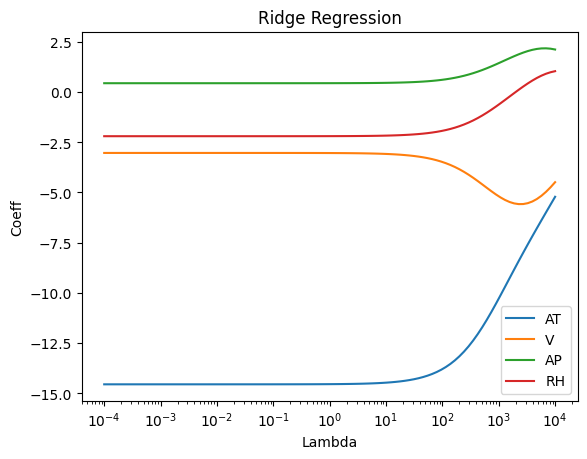

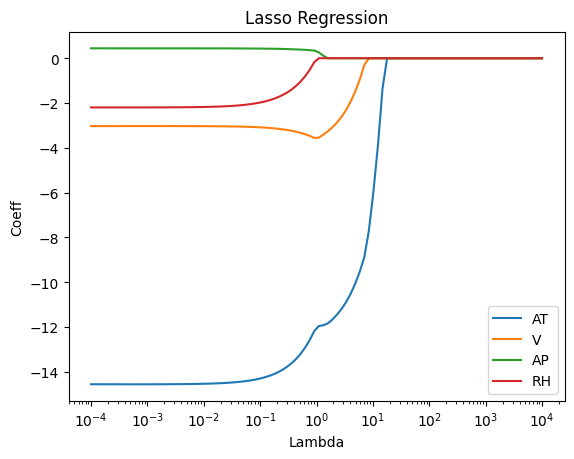

In [33]:
# Q5.1 - 5.4

df = pd.read_csv("usina.csv")
X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]

sc = StandardScaler()
X_sc = sc.fit_transform(X)

lambdas = np.logspace(-4, 4, 100)

# ridge regression
ridge_ce = []

for lam in lambdas:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_sc, y)
    ridge_ce.append(ridge.coef_)

ridge_ce = np.array(ridge_ce)

# lasso regression
lasso_ce = []

for lam in lambdas:
    lasso = Lasso(alpha=lam, max_iter=10000)
    lasso.fit(X_sc, y)
    lasso_ce.append(lasso.coef_)

lasso_ce = np.array(lasso_ce)

# plot ridge
plt.figure()
for i, feature in enumerate(X.columns):
    plt.plot(lambdas, ridge_ce[:, i], label=feature)

plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Coeff")
plt.title("Ridge Regression")
plt.legend()
plt.show()

# plot lasso
plt.figure()
for i, feature in enumerate(X.columns):
    plt.plot(lambdas, lasso_ce[:, i], label=feature)

plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Coeff")
plt.title("Lasso Regression")
plt.legend()
plt.show()

Q5 Discussion

1. What happens to coefficients as λ increases in Ridge vs Lasso?

In the Ridge plot above, all the coefficients seem to be levelling out around 0 but very gradually as the lamda number increases. Also for the coefficients like AP and RH, the coefficients seem to be going up like log. As for the Lasso plot, all of them are very abruptly going to 0 by the time lamda reaches 10 and they stabilize at this value as the lamda increases.

2. Which regression is better under multicollinearity in IVs, and why?

I think that the Ridge regression is better for the multicollinearity in Iv's because since it has the L2 penalty, it can stabilize the coefficients. This allows for a combined shrinking of all the variables together. However, the Lasso Regression sometimes picks some variables over others which does not work for the multicollinearity in Ivs.

3. Which regression is better for feature selection, and why?

Like I mentioned in question 2, since the Lasso regression can pick some variables over others and set some to 0, for picking the feature, we could allow for some features to not be taken into consideration. Since the Ridge regression is more gradual and never sets any features to exactly 0, this means that it could not correctly select features in the way that lasso does.